# Requirements

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
import os

# Loading Models

In [2]:
IMAGE_ADDRESS = os.path.join("C://Users//mahya//Downloads", "image1.jpg")
YOLO_WEIGHT = os.path.join("C://Users//mahya//Downloads//models", "yolov3.weights")
YOLO_CONFIG_PATH = os.path.join("C://Users//mahya//Downloads//models", "yolov3.cfg")
YOLO_LABELES_PATH = os.path.join("C://Users//mahya//Downloads//models", "coco.names")
CONFIDENCE = 0.5
THRESHOLD = 0.3

# load our YOLO object detector trained on COCO dataset (80 classes)
net =  cv2.dnn.readNetFromDarknet(YOLO_CONFIG_PATH, YOLO_WEIGHT)
LABELS = open(YOLO_LABELES_PATH).read().strip().split("\n")

# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

# Loading Image

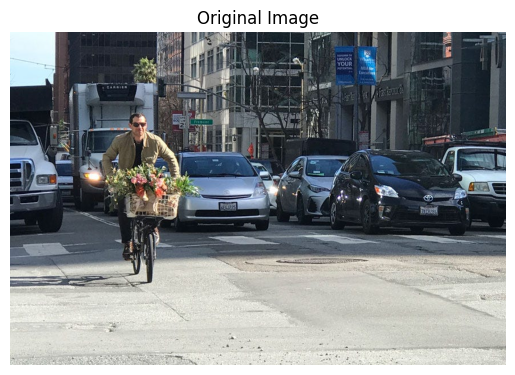

In [27]:
# Load our input image from the specified address
image = cv2.imread("C://Users//mahya//Downloads//yolo.jpg")


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Grab the spatial dimensions (height and width) of the image
H, W = image.shape[:2]

# Display Original Image using matplotlib
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")  # Hide axes
plt.show()

# Object Detection Function

In [11]:
import cv2
import numpy as np

# Constants for YOLO
CONFIDENCE = 0.5
THRESHOLD = 0.3
LABELS = open("models/coco.names").read().strip().split("\n")  # Make sure to adjust the path if needed
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

def YOLO(image, net):
    # Get the names of all the layers in the network
    ln = net.getLayerNames()
    # Get the names of the output layers (those layers that produce the final predictions)
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

    # Grab the spatial dimensions (height and width) of the image
    H, W = image.shape[:2]

    # Construct a blob from the input image and perform mean subtraction, scaling, and channel swapping
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    # Set the blob as input to the network
    net.setInput(blob)

    # Perform a forward pass through the network to get the output predictions
    layerOutputs = net.forward(ln)

    # Initialize lists to store the bounding boxes, confidences, and class IDs of the detected objects
    boxes = []
    confidences = []
    classIDs = []

    # Loop over each of the layer outputs
    for output in layerOutputs:
        # Loop over each detection in the output
        for detection in output:
            # Extract the scores for each class and find the class ID with the highest score
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            # Filter out weak predictions by ensuring the confidence is greater than the threshold
            if confidence > CONFIDENCE:
                # Scale the bounding box coordinates back to the size of the original image
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                # Use the center coordinates to derive the top-left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                # Update the lists of bounding box coordinates, confidences, and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # Apply non-maxima suppression to suppress weak, overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, THRESHOLD)

    # Ensure at least one detection exists
    if len(idxs) > 0:
        # Loop over the indexes we are keeping
        for i in idxs.flatten():
            # Extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            
            # Draw the bounding box rectangle and label on the image
            # Get the color for the current object's bounding box and label
            color = [int(c) for c in COLORS[classIDs[i]]]

            # Draw a rectangle around the detected object on the image
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

            # Prepare the text label to display the object's class and confidence score
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])

            # Draw the text label on the image above the bounding box
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Return the output image with the drawn bounding boxes and labels
    return image


# Visualizing the Result

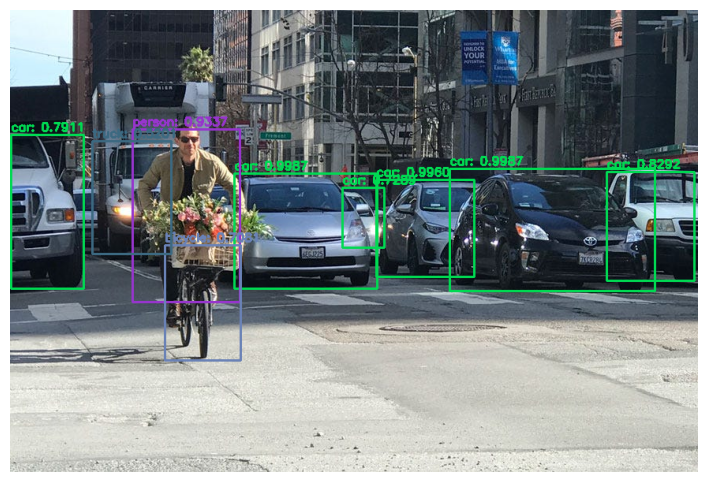

In [28]:
result = YOLO(image, net)

# Convert BGR image to RGB for plotting with matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Plotting the image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(result_rgb)
plt.axis('off')  # Turn off axis
plt.show()

In [29]:
output_path = "result_image.jpg" 
result_rgb = cv2.cvtColor(result_rgb, cv2.COLOR_BGR2RGB)
cv2.imwrite(output_path, result_rgb)
print(f"Image saved at {output_path}")

Image saved at result_image.jpg
